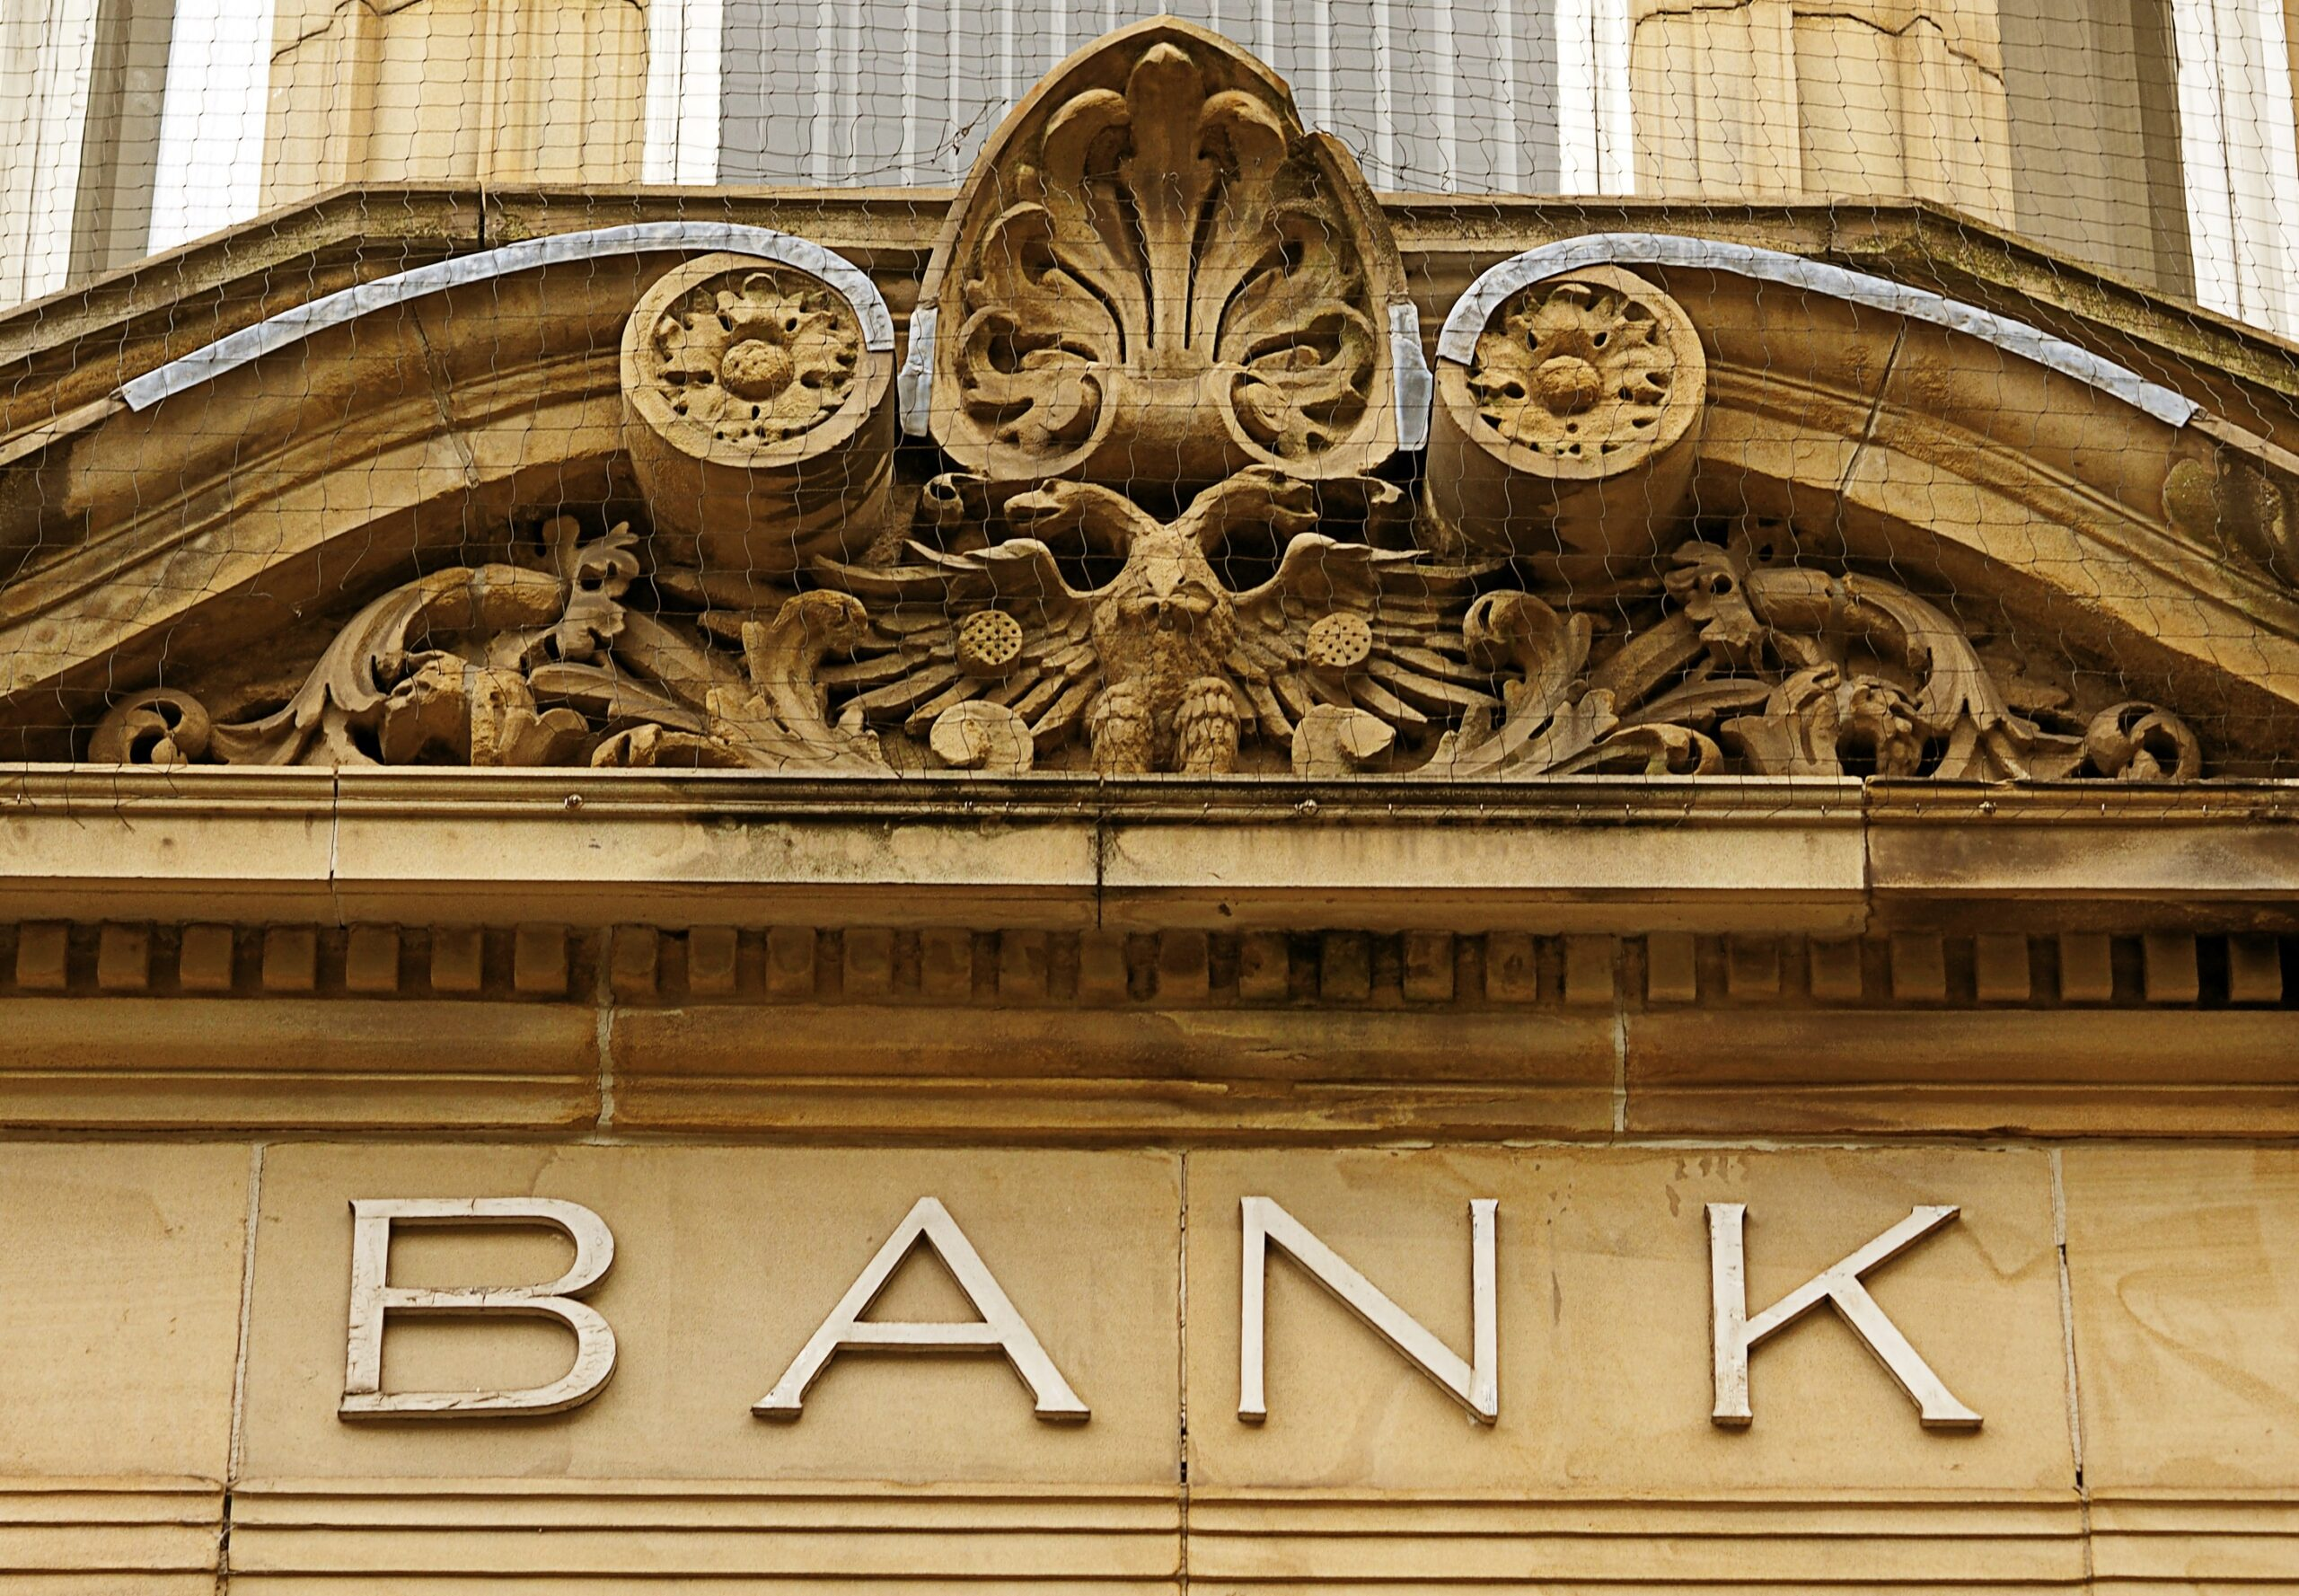

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [2]:
churn_data.drop(['RowNumber'],axis=1,inplace=True)

## ЗАДАНИЯ

### <center> **9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**

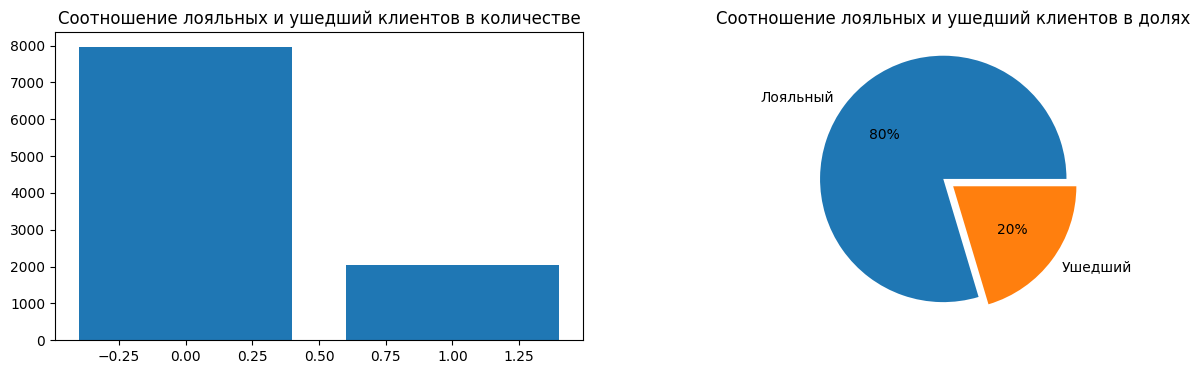

In [3]:
exited = churn_data.groupby(by='Exited',as_index=False)['CustomerId'].count()
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=exited['Exited'],
    height=exited['CustomerId']
);
axes[0].set_title("Соотношение лояльных и ушедший клиентов в количестве");

exited_pie = churn_data.groupby(by='Exited')['CustomerId'].count()
axes[1].pie(
    exited_pie,#берем данные o соотношении клиентов
    labels=exited_pie .index,
    autopct='%.0f%%',#округление до первого знака после запятой
    explode=[0.1,0.0]#доля смещения от центра
);
axes[1].set_title("Соотношение лояльных и ушедший клиентов в долях");

##### Вывод: Доля лояльных клиентов составляет - 80%, это в 4 раза больше ушидших клиентов.

### <center> **9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**

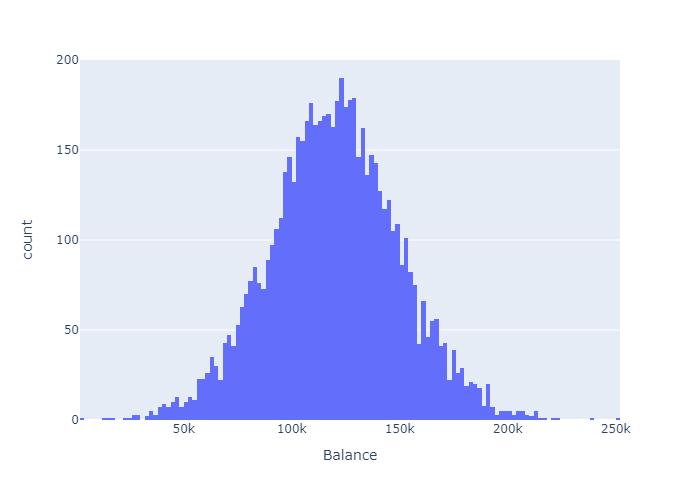

In [4]:
mask = churn_data['Balance'] >2500
fig_2 = px.histogram(
    data_frame=churn_data[mask],
    x='Balance'
)
fig_2.show("png")

##### Вывод: можно сделать вывод, что распределение близко к нормальному.

### <center> **9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

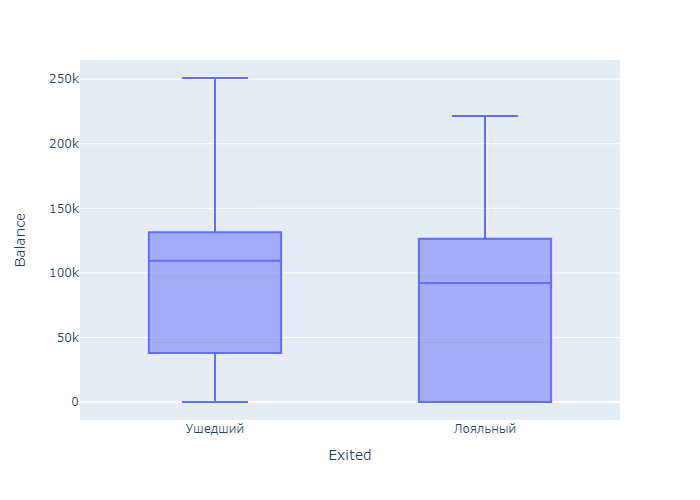

In [5]:
fig_3 = px.box(
    data_frame=churn_data,
    x='Exited',
    y='Balance'    
)
fig_3.show("png")

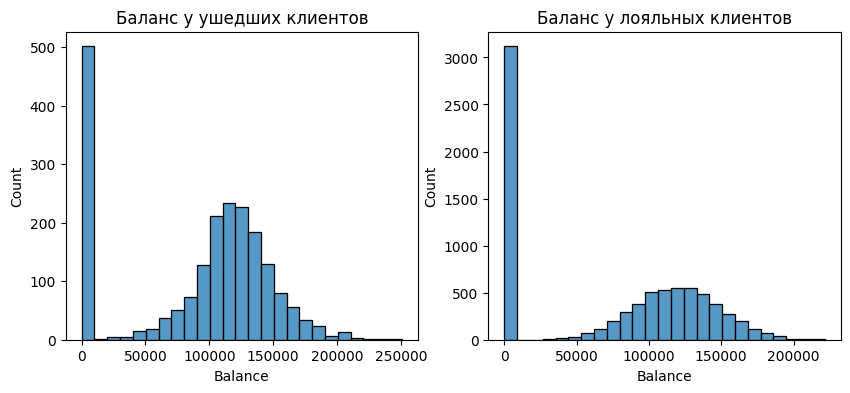

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.histplot(
    data=churn_data[churn_data['Exited']=='Ушедший'],
    x='Balance',
    bins=25,
    ax=axes[0]
);
axes[0].set_title("Баланс у ушедших клиентов");
sns.histplot(
    data=churn_data[churn_data['Exited']=='Лояльный'],
    x='Balance',
    bins=25,
    ax=axes[1]
);
axes[1].set_title("Баланс у лояльных клиентов");


#### Вывод: У ушедших клиентов суммы на накопительных счетах больше, чем у лояльных клиетов, их уход может быть связан с невыгодными условиями банка для хранения больших сумм. Также из диаграммы видно, что 25% лояльных клиетов имеют нулевой остаток на накопительном счете. При построении гистограммы распределения, хорошо видно большое количество клиентов с нулевым балансом в обоих группах.

### <center> **9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**


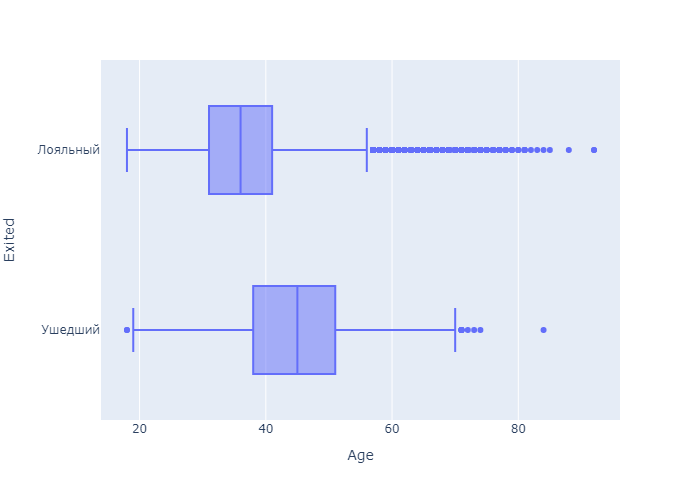

In [7]:
fig_4 = px.box(
    data_frame=churn_data,
    x='Age',
    y='Exited',
    orientation='h'   
)
fig_4.show("png")

##### Вывод: Потенциальных выбросов больше в группе лояльных клиентов, скорее всего клиентов преклонного возраста наименьшее количество. Основная аудитория банка находятся в возрастной категории от 31-38 лет.

### <center> **9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

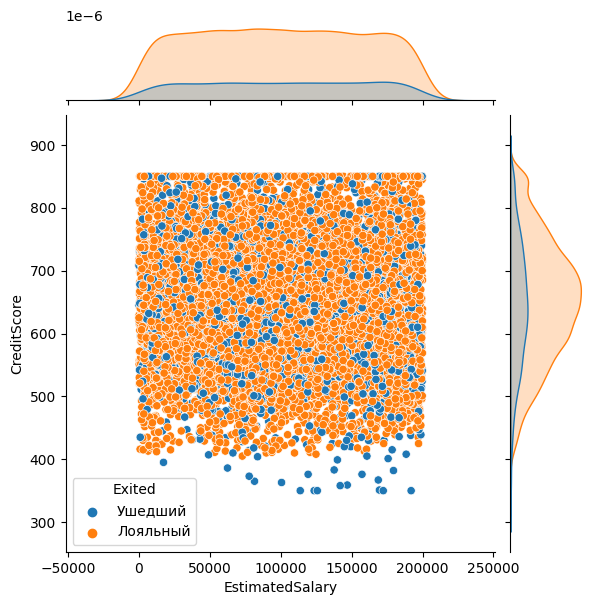

In [8]:
#строим график
fig_5=sns.jointplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited'
)

##### Вывод: Диаграмма рассеивания наглядно показывает, что никакой зависимости у этих признаков нет. Кредитный рейтинг меньше 400 есть только у ушедших клиетов. Можно заметить большое скопление по верхнему краю лояльных клиентов, что говорит об их высоком кредитном рейтинге, который совершенно не зависит от предположительного дохода клиента.

### <center> **9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

In [9]:
gone= churn_data[churn_data['Exited']=='Ушедший']['Gender'].value_counts()
gone

Gender
Female    1139
Male       898
Name: count, dtype: int64

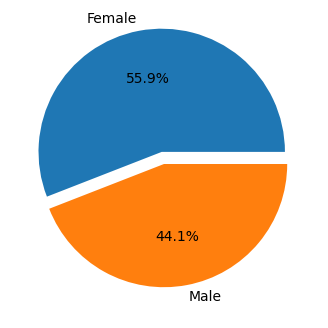

In [10]:
fig_6, axes_6 = plt.subplots(figsize=(4,4))
axes_6.pie(
    x=gone,
    labels= gone.index,
    autopct='%.1f%%',#округление до первого знака после запятой
    explode=[0.1,0.0]#доля смещения от центра
);


### <center> **9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

In [11]:
# делаем сводную таблицу
pivot_1 = churn_data.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count'
)
pivot_1 = pivot_1.fillna(0)# заменяем на 0 возможные пропуски данных
pivot_1


Exited,Лояльный,Ушедший
NumOfProducts,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,0.0,60.0


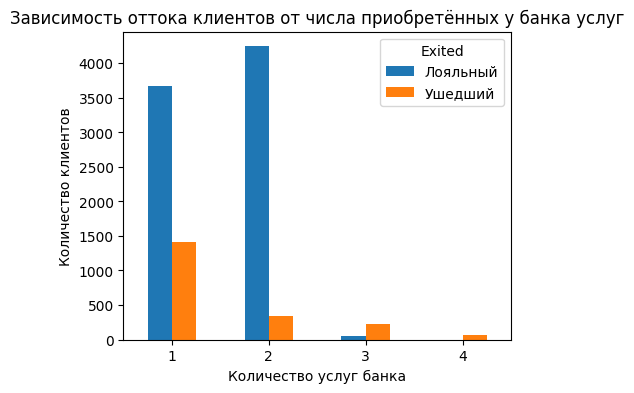

In [19]:
#строим график
fig_7, axes_7 = plt.subplots(figsize=(5,4))
pivot_1.plot(
    kind='bar',
    ax=axes_7
);
axes_7.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг');
axes_7.set_xlabel('Количество услуг банка');
axes_7.set_ylabel('Количество клиентов');
axes_7.xaxis.set_tick_params(rotation=360)

##### Вывод: Из диаграммы видно, отток значительно уменьшается, когда у клинта от 1-2 услуги. Остальные услуги либо невыгодны для клинтов, либо имеют какие-то ограничения.

### <center> **9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**

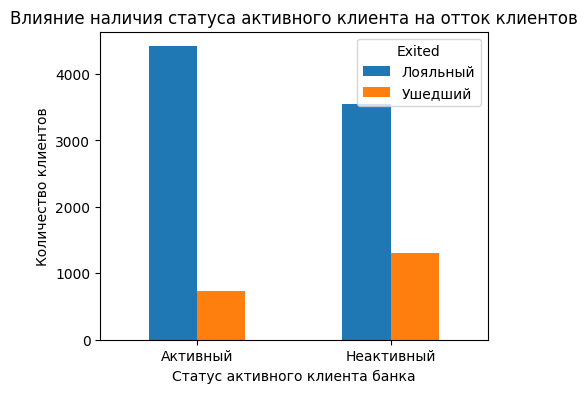

In [13]:
# делаем сводную таблицу
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(lambda x: 'Неактивный' if x == 0 else 'Активный')
pivot_2 = churn_data.pivot_table(
    'CustomerId',
    index='IsActiveMember',
    columns='Exited',
    aggfunc='count'
)
pivot_2 = pivot_2.fillna(0)# заменяем на 0 возможные пропуски данных
#строим график
fig_8, axes_8 = plt.subplots(figsize=(5,4))
pivot_2.plot(
    kind='bar',
    ax=axes_8
);
axes_8.set_title('Влияние наличия статуса активного клиента на отток клиентов');
axes_8.set_xlabel('Cтатус активного клиента банка');
axes_8.set_ylabel('Количество клиентов');
axes_8.xaxis.set_tick_params(rotation=360);

##### Вывод: Из диаграммы видно, что отток клиентов уменьшается, когда у клиентов появляется активный статус.
Предложения банку чтобы уменьшить отток клиентов среди неактивных:
1. Обеспечить высокий уровень обслуживания клиентов.
2. Реализация программы поддержки клиентов.
3. Обновить банковские услуги, выявить потребности клиентов.
4. Создать программу повышенного "КешБэка" на 1-2 месяца.

### <center> **9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**

In [14]:
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 1 if x == 'Ушедший' else 0)
# делаем сводную таблицу
pivot_3 = churn_data.pivot_table(
    values='Exited',
    index='Geography',
    aggfunc= 'mean',
)
pivot_3

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


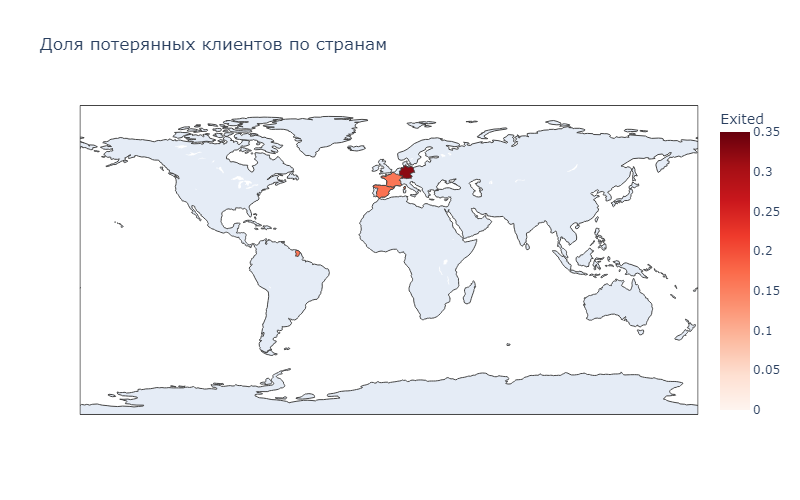

In [15]:
#строим график
fig_9 = px.choropleth(
    data_frame=pivot_3, 
    locations=pivot_3.index, 
    locationmode = "country names", 
    color= 'Exited', 
    range_color=[0, 0.35], 
    title='Доля потерянных клиентов по странам', 
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
#отображаем график
fig_9.show("png")

##### Вывод: Наблюдается большой отток клиентов в Германии 32%, это в 2 раза больше чем в Испании - 16% и Франции - 16%. Это может быть связано с тем, что упала процентная ставка. Или большинству людей понабились наличные, они сняли деньги и закрыли счета. Возможно в каком-то из конкурентных банков появились очень выгодные условия и они переманили клиентов.

### <center> **9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.**

In [16]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    

#создаем новый признак 'CreditScoreCat'
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)

#### **Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.**

In [17]:
# делаем сводную таблицу
pivot_4 = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc= 'mean',
)
#отображаем сводную таблицу
display(pivot_4)


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


#### **На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.**

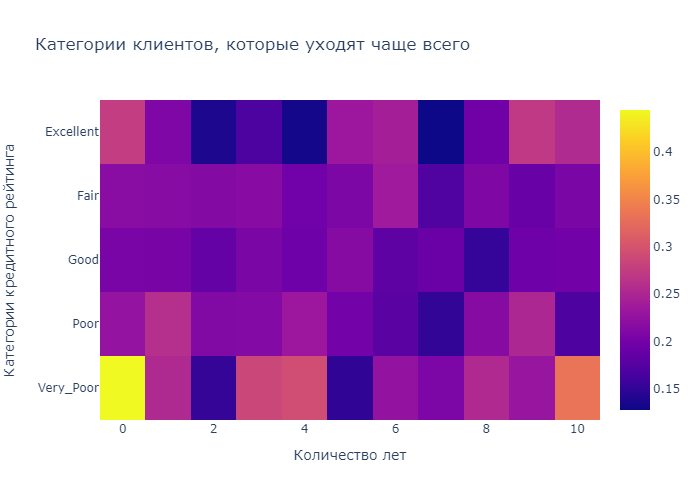

In [18]:
#строим график
fig_10 = px.imshow(    
    pivot_4,
    labels={'x': 'Количество лет', 'y': 'Категории кредитного рейтинга'},
    title='Категории клиентов, которые уходят чаще всего'
)
#отображаем график
fig_10.show("png")

##### Вывод: категория клиентов, которая уходит чаще всего это Very_Poor. По этой категории наблюдаются самые низкие показатели. 

## **Общий вывод**:

* Для успешной работы банку необходимо заверить клиентов в своей надежности, чтобы клиенты хранили большие суммы на своих счетах, чтобы уменьшить количество клиентов с нулевыми счетами.
* Обновить программы по вкладам, возможно разработать программу по повышенной выплате процентов за вклад для  старых клиентов, чтобы избежать их ухода.
* Предложить высокий процент на остаток, чтобы клинты всегда хранили на своем счете какую-либо сумму.
* Обратить внимание на основную аудиторию банка, которая находятся в возрастной категории от 31-38 лет, создать какие-то выгодные условия конкретно для этой возрастной категории.
* Обновить предоставляемые услуги для клиентов, сделать специальные предложения.